In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

results_path = Path("../data/experiments/ffnn_v1.2/pred_results_ffnn_v1.2.csv")

In [2]:
df = pd.read_csv(results_path)
print(f"Total predictions: {len(df)}")
df.head()

Total predictions: 97


,peptide,protein,p_def_epitope,p_uncertain,p_not_epitope,pred_class,pred_index,max_prob
0,EELDQWFKNQTSVAPDLSLDYINVTFLDLQ,MFLILLISLPTAFAVIGDLKCTSDNINDKDTGPPPISTDTVDVTNG...,0.521800,0.312782,0.165418,Def epitope,0,0.521800
1,FKEELDKYFKNHTSPDVDLGDISGINASVV,MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...,0.538082,0.306494,0.155424,Def epitope,0,0.538082
2,KPTKRSFIEDLLFNKVTLADAGFMKQYGEC,MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...,0.241648,0.425079,0.333273,Uncertain,1,0.425079
3,CDVVIGIINNTVYDPLQPELDSFKEELDKY,MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...,0.291081,0.419165,0.289754,Uncertain,1,0.419165
4,VNYTKAPYVMLNTSIPNLPDFKEELDQWFK,MFLILLISLPTAFAVIGDLKCTSDNINDKDTGPPPISTDTVDVTNG...,0.323831,0.405723,0.270446,Uncertain,1,0.405723


In [3]:
class_counts = df["pred_class"].value_counts().sort_index()
class_frac = class_counts / class_counts.sum()

summary = pd.DataFrame({"counts": class_counts, 
                        "fraction": class_frac})
summary

,counts,fraction
pred_class,,
Def epitope,57,0.587629
Not epitope,24,0.247423
Uncertain,16,0.164948


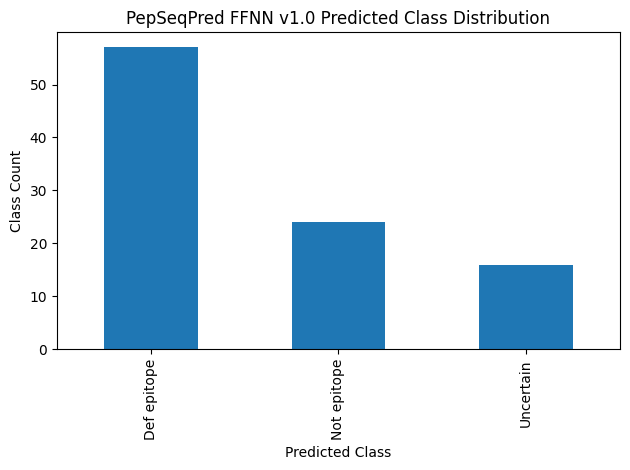

In [4]:
plt.figure()
class_counts.plot(kind="bar")
plt.xlabel("Predicted Class")
plt.ylabel("Class Count")
plt.title("PepSeqPred FFNN v1.0 Predicted Class Distribution")
plt.tight_layout()
plt.show()